https://www.axiomoptics.com/wp-content/uploads/2021/09/Alvium_SWIR-Flyer_EN.pdf

In [1]:
import numpy as np
from utils.units import *
from utils.consts import *
from matplotlib import pyplot as plt

## level splitting

In [40]:
# split the 5P3/2 line with Autler-Townes effect from 1529 driving 5P3/2 <-> 4D5/2

P = 1*W
w = 100*um
I = P/w**2 # for top hat beam
E = np.sqrt(2*I/(c*e0))
mat_elem = 10.862*ee*a0 # from https://www1.udel.edu/atom/Rb1.html
Omega = E*mat_elem/hbar

In [22]:
Omega/(2*np.pi*1e9)

np.float64(38.15009079860378)

In [25]:
splitting(1e-8)/(2*np.pi)

np.float64(607177.5530002426)

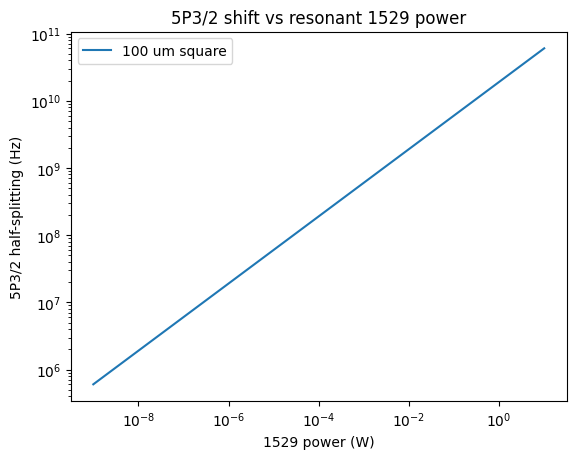

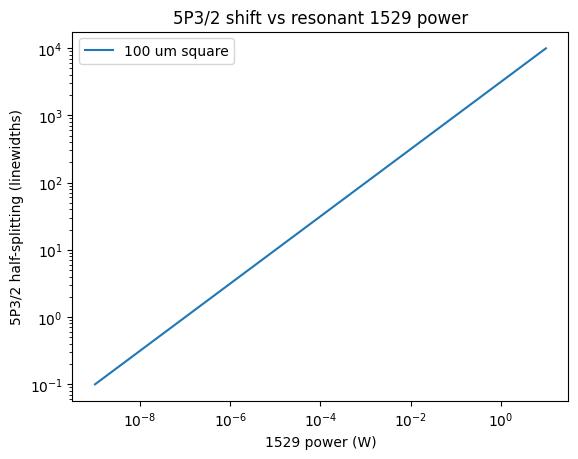

In [39]:
splitting = lambda P: np.sqrt(2*(P/(c*e0*w**2)))*mat_elem/(2*np.pi*hbar)
watts = np.linspace(1e-3*uW, 10*W, 100)
to_linewidths = lambda hz: hz/(3.8109e+07/(2*np.pi)) # 5P3/2 linewidth

fig,ax = plt.subplots()
ax.set_title("5P3/2 shift vs resonant 1529 power")
ax.plot(watts, splitting(watts)/2, label='100 um square')
ax.set_xlabel("1529 power (W)")
ax.set_ylabel("5P3/2 half-splitting (Hz)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

fig,ax = plt.subplots()
ax.set_title("5P3/2 shift vs resonant 1529 power")
ax.plot(watts, to_linewidths(splitting(watts)/2), label='100 um square')
ax.set_xlabel("1529 power (W)")
ax.set_ylabel("5P3/2 half-splitting (linewidths)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

/var/folders/5m/g5fs7xk54kn3vvq43xy__w140000gp/T/ipykernel_21061/919923819.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


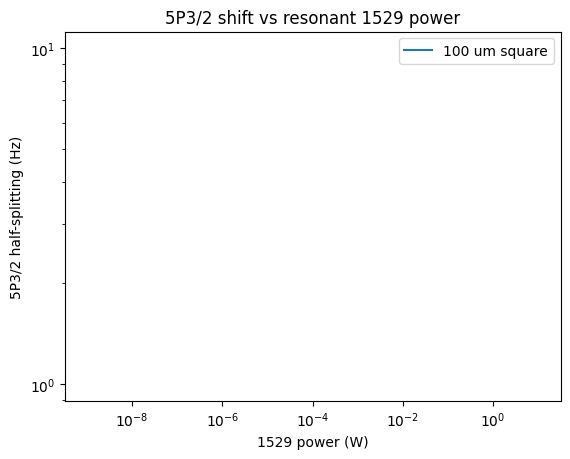

/var/folders/5m/g5fs7xk54kn3vvq43xy__w140000gp/T/ipykernel_21061/919923819.py:31: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


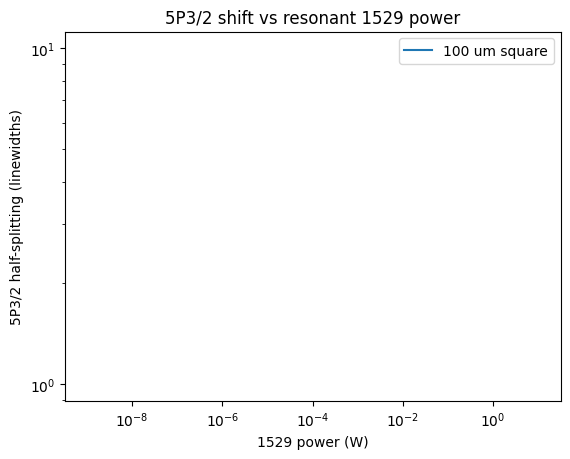

In [52]:
# now plot the differential shift on 5s1/2 to 5p3/2 - there's a mistake somewhere here

I = lambda P: P/w**2 # top hat
E = lambda I: np.sqrt(2*I/(c*e0))
splitting = lambda P: E(I(P))*mat_elem/(2*np.pi*hbar)

alpha_5s12 = 427.77/(4*np.pi*e0*a0**3/(2*np.pi*hbar)) # dynamic alpha0 at 1529, SI. https://www1.udel.edu/atom/Rb1Polarizability.html

ground_state_shift = lambda P: -0.25*E(I(P))**2*alpha_5s12/(2*np.pi*hbar) # this is wrong
diff_splitting = lambda P: splitting(P)/2 + ground_state_shift(P)

watts = np.linspace(1e-3*uW, 10*W, 100)
to_linewidths = lambda hz: hz/(3.8109e+07/(2*np.pi)) # 5P3/2 linewidth

fig,ax = plt.subplots()
ax.set_title("5P3/2 shift vs resonant 1529 power")
ax.plot(watts, diff_splitting(watts), label='100 um square')
ax.set_xlabel("1529 power (W)")
ax.set_ylabel("5P3/2 half-splitting (Hz)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

fig,ax = plt.subplots()
ax.set_title("5P3/2 shift vs resonant 1529 power")
ax.plot(watts, to_linewidths(diff_splitting(watts)), label='100 um square')
ax.set_xlabel("1529 power (W)")
ax.set_ylabel("5P3/2 half-splitting (linewidths)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

In [54]:
alpha_5s12 = 427.77*4*np.pi*e0*a0**3/(2*np.pi*hbar) # dynamic alpha0 at 1529, SI. https://www1.udel.edu/atom/Rb1Polarizability.html

ground_state_shift = lambda P: -0.25*E(I(P))**2*alpha_5s12/(2*np.pi)
ground_state_shift(1*mW)

np.float64(-3.025943598605919e+35)

In [56]:
4*np.pi*e0*a0**3/(2*np.pi*hbar)

2.488318468522364e-08

## imaging

In [6]:
# camera array size (Alvium 1800 U-030)
pix = 5*um
print("horiz x vertical:",pix*656/mm, "x", pix*520/mm, "(mm)")

horiz x vertical: 3.28 x 2.5999999999999996 (mm)


In [6]:
"""
what magnification can we reasonably get given the low NA path from 
the atoms up to where the module will be on the mezzanine?
"""

# 250 mm lens to first Fourier plane, neglecting path length through windows
print(20.954+70.153+44.794+70.057+39.77, "~ 250 mm")

# to the image plane on the mezzanine, neglecting path length through windows
print(43.179+210.158, "~  mm")

245.72800000000004 ~ 250 mm
511.29200000000003 ~  mm


In [16]:
92.855/50

1.8571

In [20]:
# collimator focal length 
((10.1*um/2)*(3*mm)*np.pi/(1529*nm))/mm

31.128272532299125

In [24]:
# beam waist at lens
w0=10.1*um/2
zR = np.pi*w0**2/(1529*nm)
z = 30*mm # roughly
w0*np.sqrt(1+(z/zR)**2)/mm

np.float64(2.8912666833864886)

In [33]:
# beam waist at lens
NA = np.sin(np.arctan2(6*mm/2,70*mm))
1529*nm/(2*NA)/um

np.float64(17.854707960678358)

In [28]:
np.arctan2(7/2,100)

np.float64(0.034985718828525754)

## top hat

In [38]:
# this is the size of a diffraction limited beam, not the smallest top hat width
efl = 250*mm
lmbda = 1529*nm
d = 25*mm # input beam dia - check this in CAD
DL = 4*efl*lmbda/(np.pi*d) # output spot full width
DL/um # diffraction limited beam size

19.46783263900064

In [39]:
# top hat quality factor
TH = 100*um
TH/DL

5.136678635692924

we want a tophat that doesn't expand super quickly so the intensity variation isn't too bad
estimate this assuming Gaussian propagation (the tophat expansion will be faster, but this sets
a lower bound on the variation we can expect).

Text(0, 0.5, 'intensity relative to focus')

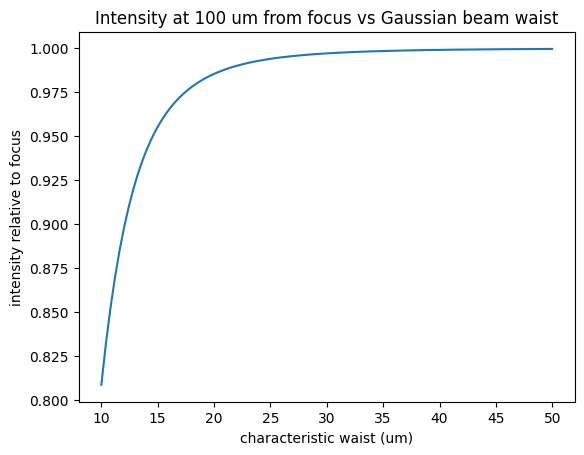

In [50]:
lmbda = 1529*nm
zr = lambda w0: np.pi*w0**2/lmbda
wz = lambda z, w0: w0*np.sqrt(1+(z/zr(w0))**2)

z = 100*um # focus to edge of the array
w0pts = np.linspace(10*um,50*um,100) # different characteristic waists
plt.plot(w0pts/um, (w0pts/wz(z, w0pts))**2)
plt.title(f"Intensity at {z/um:.0f} um from focus vs Gaussian beam waist")
plt.xlabel("characteristic waist (um)")
plt.ylabel("intensity relative to focus")

Text(0, 0.5, 'intensity relative to focus')

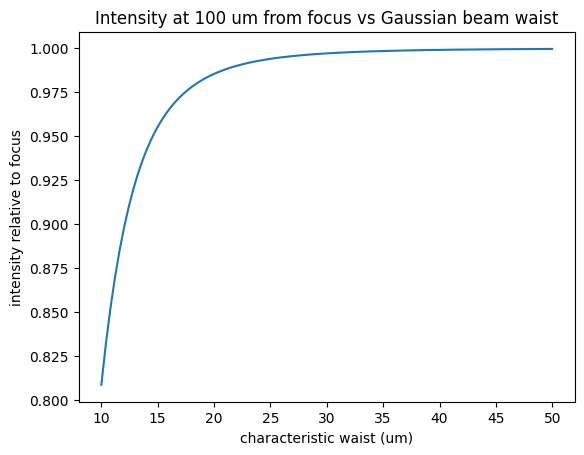

In [50]:
lmbda = 1529*nm
zr = lambda w0: np.pi*w0**2/lmbda
wz = lambda z, w0: w0*np.sqrt(1+(z/zr(w0))**2)

z = 100*um # focus to edge of the array
w0pts = np.linspace(10*um,50*um,100) # different characteristic waists
plt.plot(w0pts/um, (w0pts/wz(z, w0pts))**2)
plt.title(f"Intensity at {z/um:.0f} um from focus vs Gaussian beam waist")
plt.xlabel("characteristic waist (um)")
plt.ylabel("intensity relative to focus")

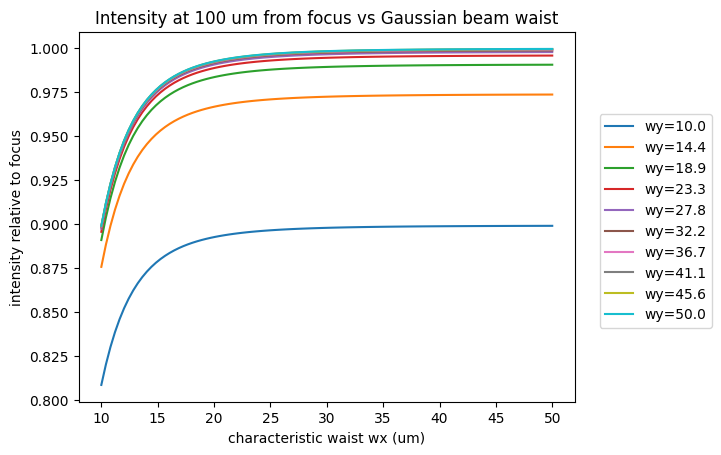

In [54]:
# if we have an elliptical beam

lmbda = 1529*nm
zr = lambda w0: np.pi*w0**2/lmbda
wz = lambda z, w0: w0*np.sqrt(1+(z/zr(w0))**2)

z = 100*um # focus to edge of the array
wxpts = np.linspace(10*um,50*um,100) # different characteristic waists in x
wypts = np.linspace(10*um,50*um,10)
for wy in wypts:
    plt.plot(wxpts/um, (wxpts/wz(z, wxpts))*(wy/wz(z, wy)), label=f'wy={wy/um:.1f}')
plt.title(f"Intensity at {z/um:.0f} um from focus vs Gaussian beam waist")
plt.xlabel("characteristic waist wx (um)")
plt.ylabel("intensity relative to focus")
plt.legend(loc=(1.05,0.2))

In [174]:
# https://www.holoor.co.il/optical-calculator/beam-shapers/

# inputs
lmbda = 1529*nm
efl = 100*mm
D = 2*mm # beam dia
d = 100*um # desired top-hat width

x_pts = np.linspace(-1.5*d, 1.5*d, 300)
tophat_pts = abs(x_pts) < d/2

# diffraction limited spot
NA = np.sin(np.arctan(0.5*D/efl))
wD = 1.272*lmbda/(4*NA) # diffraction limited spot waist times some factor
# I think the factor accounts for a difference in definition

print(f"diffraction limited spot diameter: {2*wD/um:.1f} um")
xc_pts = np.arange(-2.5*wD, 2.5*wD, x_pts[1]- x_pts[0])
spot_pts = np.exp(-2*(xc_pts/wD)**2)
spot_pts /= sum(spot_pts)

diffraction limited spot diameter: 97.2 um


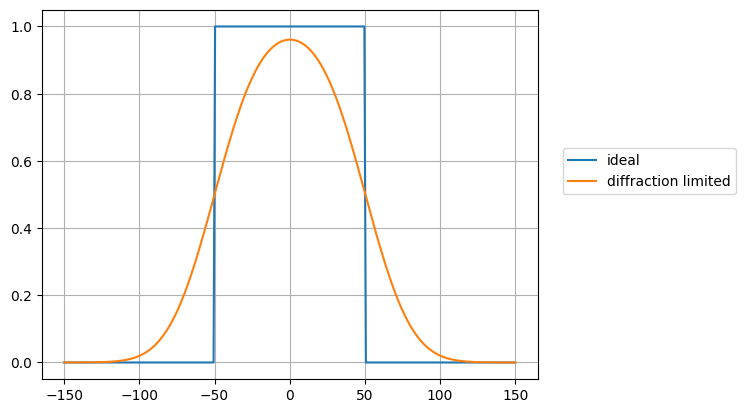

In [175]:
plt.plot(x_pts/um, tophat_pts, label='ideal')
plt.plot(x_pts/um, np.convolve(tophat_pts, spot_pts, mode='same'), label='diffraction limited')
plt.legend(loc=(1.05,0.5))
plt.grid(visible=None, which='major')

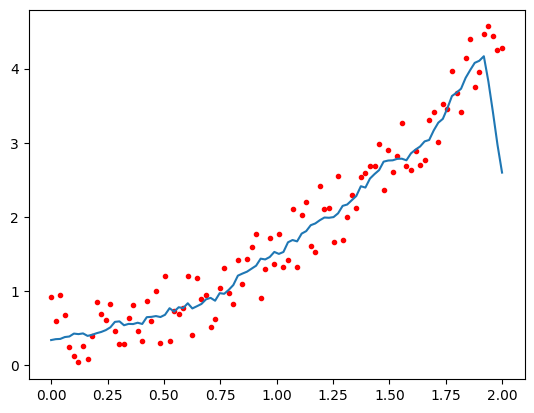

In [119]:
N = 10
x = np.linspace(0, 2, 100)
y = x**2 + np.random.uniform(size=x.shape)
y_smooth = np.convolve(y, np.ones((N,))/N, mode='same') 
plt.plot(x, y, 'r.')
plt.plot(x, y_smooth)
plt.show()

In [107]:
len(y_smooth), len(x), len(np.ones((N,))/N)

(100, 100, 10)

In [114]:
np.sum(np.ones((N,))/N)

np.float64(1.0)